<a href="https://colab.research.google.com/github/AdonyPerez/EjerciciosPythonModulo1/blob/main/Examen_final_ML_AVANZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Link de modulo empaquetado.
https://drive.google.com/drive/folders/14TJtIzBctfuf-LvO3cdZmePyDGycPAyO?usp=share_link
#Scrib para realizar pruebas en el modulo.
https://colab.research.google.com/drive/1URADBzMZnqEJpzUcDSyEkxMWdiD29cjF?usp=sharing

In [ ]:
#Cargamos modulo.
from google.colab import files
files.upload()

Saving OnlineRetail1.xlsx to OnlineRetail1.xlsx


In [ ]:
#Convertimos el modulo en dataframe.
import pandas as pd 
df = pd.read_excel("OnlineRetail1.xlsx")

In [ ]:
#Se corrio con los datos correctos, al momento de realizar una regresion lineal es imposible, se utilizo Spyder, kaggle online, 
#jupyter lab y se toma la desicion de trabajar solo con el 20% de los datos. 
df = df.sample(frac=0.20)

In [ ]:
#Cargamos modulos para el procesamiento.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

#Preprocesamiento.

In [ ]:
#Visualizamos los primeros datos del dataset.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
215110,555647,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-06-06 13:43:00,2.95,12957.0,United Kingdom
323388,565295,23189,SET OF 12 FORK CANDLES,6,2011-09-02 12:01:00,2.89,12794.0,Portugal
37521,539469,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,1,2010-12-19 13:59:00,3.75,17841.0,United Kingdom
151819,549569,84978,HANGING HEART JAR T-LIGHT HOLDER,6,2011-04-10 15:15:00,1.25,15547.0,United Kingdom
111031,545710,22254,FELT TOADSTOOL LARGE,12,2011-03-07 09:52:00,1.25,13117.0,United Kingdom


In [ ]:
#Se imprime los valores de cada columna para saber la cantidad
print("El numero de filas: ", df.shape[0])
print("El numero de columnas: ", df.shape[1])

El numero de filas:  108382
El numero de columnas:  8


In [ ]:
#Veamos el tipo de Dtypr que hay en las columnas.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108382 entries, 215110 to 450401
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    108382 non-null  object        
 1   StockCode    108382 non-null  object        
 2   Description  108077 non-null  object        
 3   Quantity     108382 non-null  int64         
 4   InvoiceDate  108382 non-null  datetime64[ns]
 5   UnitPrice    108382 non-null  float64       
 6   CustomerID   81372 non-null   float64       
 7   Country      108382 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.4+ MB


In [ ]:
#Se eliminara los IDs faltantes de CustomerID 
print("IDs y sus valores unicos:", len(df['CustomerID'].unique().tolist()))

IDs y sus valores unicos: 4111


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,108382.000000,108382.000000,81372.000000
mean,10.370209,4.996171,15273.774480
std,407.697100,133.218066,1715.847948
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13894.750000
50%,3.000000,2.080000,15144.000000
75%,10.000000,4.130000,16778.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Se ajusta el modelo debido a que la columna posea datos diferentes a los numeros.
#Filtramos datos
anular = df[df['InvoiceNo'].astype(str).str.contains('C')]
anular.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
161762,C550485,21232,STRAWBERRY CERAMIC TRINKET BOX,-4,2011-04-18 14:15:00,1.25,13317.0,United Kingdom
411009,C572187,POST,POSTAGE,-1,2011-10-21 11:00:00,18.00,12403.0,Denmark
146113,C548972,84279P,CHERRY BLOSSOM DECORATIVE FLASK,-4,2011-04-05 11:42:00,3.75,15674.0,United Kingdom
341323,C566751,22197,POPCORN HOLDER,-4,2011-09-14 15:42:00,0.85,14911.0,EIRE
87145,C543633,22776,SWEETHEART CAKESTAND 3 TIER,-5,2011-02-10 16:24:00,9.95,17188.0,United Kingdom


In [ ]:
#Verificamos sí es positiva y las cantidades negativas son rechazadas
anular[anular['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
print("Número de transacciones canceladas:", len(anular))
#Eliminamos las transiciones ya que no son utiles.
print("Número total de transacciones con cantidad negativa:", df[df['Quantity'] <= 0 ]['Quantity'].count())

Número de transacciones canceladas: 1858
Número total de transacciones con cantidad negativa: 2135


In [ ]:
#Visualizamos los primeros datos de UnitPrice.
df[df['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61702,541482,22837,NaN,-35,2011-01-18 12:32:00,0.0,NaN,United Kingdom
142008,548540,90035A,NaN,-9,2011-03-31 17:51:00,0.0,NaN,United Kingdom
147787,549132,20756,NaN,-70,2011-04-06 15:22:00,0.0,NaN,United Kingdom
193575,553539,22522,CHILDS GARDEN FORK BLUE,1,2011-05-17 15:27:00,0.0,NaN,United Kingdom
193205,553521,22626,BLACK KITCHEN SCALES,1,2011-05-17 14:35:00,0.0,NaN,United Kingdom


In [ ]:
#Existen 2 datos que sus valores son negativos y no son requeridos para el diseño y se eliminaran.
df[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#Las transcaciones negativas tiene un precio de 0
d = df[~df['InvoiceNo'].astype(str).str.contains('C')]  
print("Número de transacciones con valor de cantidad negativo entre las transacciones no canceladas:" ,len(d[d['Quantity']<=0]))
print("Número de transacciones con precio cero y cantidad negativa" ,len(d[(d['Quantity']<=0) & (d['UnitPrice'] == 0)]))

Número de transacciones con valor de cantidad negativo entre las transacciones no canceladas: 277
Número de transacciones con precio cero y cantidad negativa 277


In [ ]:
#Verifiquemos la cantidad de datos (%) cuanto representa
print("Porcentaje de transacciones canceladas:" , round(len(anular)/len(df)*100, 2),"%")
print("Porcentaje de transacciones con precio cero o negativo" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")
#Vemos que la cantidad es minima pequeña y no llegará afectar.

Porcentaje de transacciones canceladas: 1.71 %
Porcentaje de transacciones con precio cero o negativo 0.46 %


In [ ]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]

In [ ]:
#Verificamos que las columnas que poseen informacion invalidad, ya no estan.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106023 entries, 215110 to 450401
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    106023 non-null  object        
 1   StockCode    106023 non-null  object        
 2   Description  106023 non-null  object        
 3   Quantity     106023 non-null  int64         
 4   InvoiceDate  106023 non-null  datetime64[ns]
 5   UnitPrice    106023 non-null  float64       
 6   CustomerID   79600 non-null   float64       
 7   Country      106023 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.3+ MB


In [ ]:
#verifiquemos las columnas duplicadas y eliminadas 
print("Número de transacciones duplicadas:", len(df[df.duplicated()]))

Número de transacciones duplicadas: 237


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
#se suprime las columna ID de clientes faltantes
df = df.dropna(subset=['CustomerID'])

#Descripcion

In [ ]:
#La informacion encontrada tiene letras en mayuscula y minuscula, lo que cambios a minuscula.
df['Description'] = df['Description'].str.lower()

In [ ]:
print("Number of unique descriptions:", len(df['Description'].unique().tolist()))

Number of unique descriptions: 3417


In [ ]:
#Verificamos sí la informacion esta en minuscula.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
215110,555647,22699,roses regency teacup and saucer,6,2011-06-06 13:43:00,2.95,12957.0,United Kingdom
323388,565295,23189,set of 12 fork candles,6,2011-09-02 12:01:00,2.89,12794.0,Portugal
37521,539469,84997D,pink 3 piece polkadot cutlery set,1,2010-12-19 13:59:00,3.75,17841.0,United Kingdom
151819,549569,84978,hanging heart jar t-light holder,6,2011-04-10 15:15:00,1.25,15547.0,United Kingdom
111031,545710,22254,felt toadstool large,12,2011-03-07 09:52:00,1.25,13117.0,United Kingdom


In [ ]:
df['Description'] = df['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True) 

In [ ]:
print("Number of unique descriptions:", len(df['Description'].unique().tolist()))

Number of unique descriptions: 3411


In [ ]:
df = df.loc[df['StockCode'].astype(str).str[0:4].str.isdigit()]

In [ ]:
len(df['StockCode'].unique().tolist())

3280

In [ ]:
#Escogemos los datos que tengan mes y año.
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year

In [ ]:
#Escogemos los datos que tengan fin de semana.
df['WeekDay'] = df['InvoiceDate'].dt.day_name()

In [ ]:
#Escogemos los datos que tengan mes año
df['month_year'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))

In [ ]:
#Escogemos los datos que hora
df['hour'] = df['InvoiceDate'].dt.hour

In [ ]:
#Vemos la data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour
215110,555647,22699,roses regency teacup and saucer,6,2011-06-06 13:43:00,2.95,12957.0,United Kingdom,6,2011,Monday,2011-06-01,13
323388,565295,23189,set of 12 fork candles,6,2011-09-02 12:01:00,2.89,12794.0,Portugal,9,2011,Friday,2011-09-01,12
37521,539469,84997D,pink 3 piece polkadot cutlery set,1,2010-12-19 13:59:00,3.75,17841.0,United Kingdom,12,2010,Sunday,2010-12-01,13
151819,549569,84978,hanging heart jar tlight holder,6,2011-04-10 15:15:00,1.25,15547.0,United Kingdom,4,2011,Sunday,2011-04-01,15
111031,545710,22254,felt toadstool large,12,2011-03-07 09:52:00,1.25,13117.0,United Kingdom,3,2011,Monday,2011-03-01,9


In [ ]:
#Agregamos la columna de UnitPrice
df['revenue'] = df['UnitPrice'] * df['Quantity']

In [ ]:
#Atravez de una grafica se tiene la seccion de datos.
plot = pd.DataFrame(df.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df.groupby(['WeekDay'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(df.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(df.groupby(['month_year'])['revenue'].sum()).reset_index()

In [ ]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

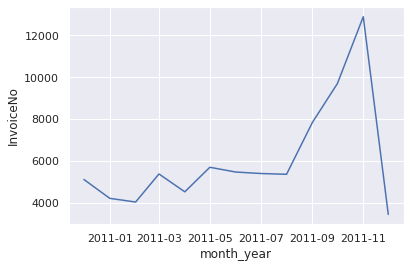

In [ ]:
#A traves de una grafica se obtiene, la informacion de cual mes es la cuspide.
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)
#Se observa que es el mes de Noviembre.

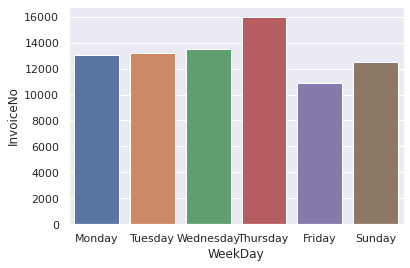

In [ ]:
#Veamos cual dia es el que tiene mayor demanda.
ax = sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)
#Vemos que Jueves es el dia con mayor demanda.

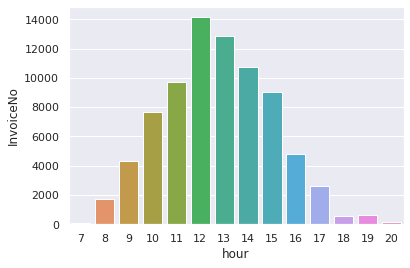

In [ ]:
#Veamos la hora critica en las horas del dia.
ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)
#La mayor demanda se encuentra a las 12 pm.

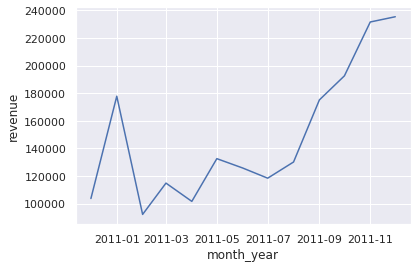

In [ ]:
#Veamos que mes es donde las personas viajan mas y genera mas ingresos.
ax = sns.lineplot(x = 'month_year', y='revenue', data = plot5)
#Vemos que es el mes de noviembre.

3.   Precios.



In [ ]:
pd.DataFrame(df['UnitPrice'].describe())

,UnitPrice
count,79060.000000
mean,2.864673
std,3.891388
min,0.040000
25%,1.250000
50%,1.850000
75%,3.750000
max,295.000000


In [ ]:
#Veamos los datos y verifiquemos cuales fueron las ventas mayores a 50.
df[df['UnitPrice']>50]['Description'].unique().tolist()

['love seat antique white metal',
 'rustic  seventeen drawer sideboard',
 'vintage blue kitchen cabinet',
 'school desk and chair ',
 'decorative hanging shelving unit',
 'regency mirror with shutters',
 'chest natural wood 20 drawers',
 'vintage red kitchen cabinet']

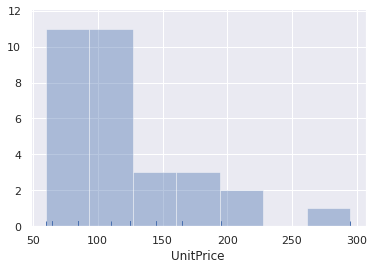

In [ ]:
#Veamos como se comporta los bienes costosos.
sns.distplot(df[df['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

4.   Visualizacion de los paises con mayor transaccion. 



In [ ]:
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3679
14,Germany,93
13,France,83
30,Spain,29
3,Belgium,24
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,11
24,Norway,10


In [ ]:
print("Las transacciones se realizaron en", len(df['Country'].unique().tolist()), "paises diferentes")

Las transacciones se realizaron en 37 paises diferentes


In [ ]:
print("Número de transacciones en las que no se especifica el país:", len(df[df['Country']=='Unspecified']))

Número de transacciones en las que no se especifica el país: 52


In [ ]:
plot6 = pd.DataFrame(df.groupby(['Country'])['revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(df.groupby(['Country'])['revenue'].count()).reset_index()
plot7 = plot7.sort_values(['revenue']).reset_index(drop=True)

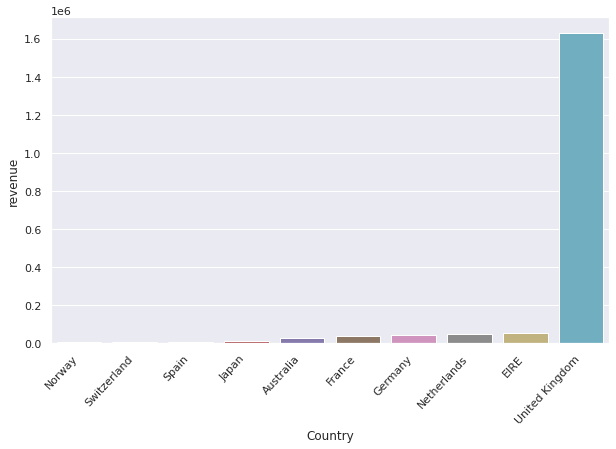

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax=sns.barplot(x='Country', y='revenue',data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()
#Vemos que por la grafica que Reino unido es el que tiene mas ventas.

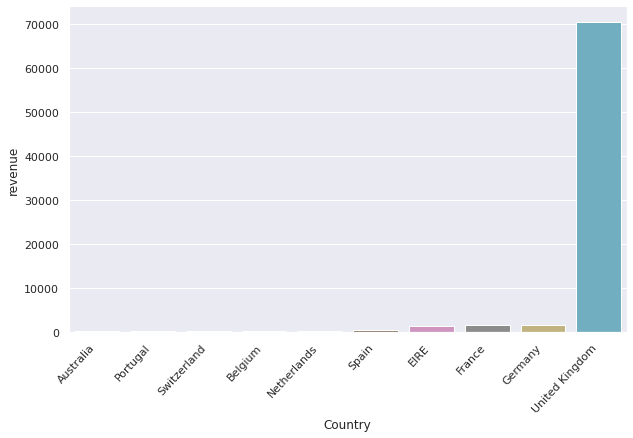

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax=sns.barplot(x='Country', y='revenue',data=plot7.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()
#Reino unido es el mayor proveedor de ventas por lo cual es el pais con mas numero de pedidos.

#Analisis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79060 entries, 215110 to 429182
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    79060 non-null  object        
 1   StockCode    79060 non-null  object        
 2   Description  79060 non-null  object        
 3   Quantity     79060 non-null  int64         
 4   InvoiceDate  79060 non-null  datetime64[ns]
 5   UnitPrice    79060 non-null  float64       
 6   CustomerID   79060 non-null  float64       
 7   Country      79060 non-null  object        
 8   month        79060 non-null  int64         
 9   year         79060 non-null  int64         
 10  WeekDay      79060 non-null  object        
 11  month_year   79060 non-null  datetime64[ns]
 12  hour         79060 non-null  int64         
 13  revenue      79060 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(5)
memory usage: 9.0+ MB


In [ ]:
#Eliminamos las columnas siguientes que no seran necesarias para es el estudio del dataframe
df = df.drop(["InvoiceNo", "month_year", "StockCode", "InvoiceDate", "revenue" ], axis = 1 )

In [ ]:
#Verificamos sí se eliminaron las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79060 entries, 215110 to 429182
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  79060 non-null  object 
 1   Quantity     79060 non-null  int64  
 2   UnitPrice    79060 non-null  float64
 3   CustomerID   79060 non-null  float64
 4   Country      79060 non-null  object 
 5   month        79060 non-null  int64  
 6   year         79060 non-null  int64  
 7   WeekDay      79060 non-null  object 
 8   hour         79060 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 6.0+ MB


In [ ]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [ ]:
# apply to our final four categorical variables
df = dummy_creation(df, ['Description', 'Country', 'WeekDay'])

In [ ]:
#data.dtype()

In [ ]:
#Eliminamos las columnas siguientes que no seran necesarias para es el estudio del dataframe
df = df.drop(['Description', 'Country', 'WeekDay'], axis = 1 )

In [ ]:
print(df.dtypes)

Quantity               int64
UnitPrice            float64
CustomerID           float64
month                  int64
year                   int64
                      ...   
WeekDay:Monday         uint8
WeekDay:Sunday         uint8
WeekDay:Thursday       uint8
WeekDay:Tuesday        uint8
WeekDay:Wednesday      uint8
Length: 3454, dtype: object


In [ ]:
# Clase model_selection : funcion train_test_split
from sklearn.model_selection import train_test_split
# Submodulo metrics : Varios indicadores de calidad 
from sklearn import metrics
#Clase model_selection : funcion train_test_split
from sklearn.model_selection import train_test_split
# Clase linear_model : funcion LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(["Quantity"], axis = 1 )
y = df.Quantity

In [ ]:
y.shape

(79060,)

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, # Dataframe con las variables independientes
                                                   y, # Un dato de tipo Series : variable dependiente
                                                   test_size= 0.1, # especificamos el % de los datos para test el algoritmo
                                                   random_state= 2025 # semilla
                                                   )

In [ ]:
#Se corrio con los datos correctos, al momento de realizar una regresion lineal es imposible, se utilizo Spyder, kaggle online, 
#jupyter lab y se toma la desicion de trabajar solo con el 20% de los datos. 
#from seaborn import load_dataset
df.sample(frac=0.20).shape 

(15812, 3454)

In [ ]:
# INstanciamos la clase para el modelado 
ModelQuantity = LinearRegression()

In [ ]:
# Siguiente paso : Ajustar el modelo 
ModelQuantity.fit(X_train, y_train)

LinearRegression()

In [ ]:
ModelQuantity.score(X_test, y_test)

-926445015.2872686

**Conclusion**
El dataset poseé informacion de transaciones y no se identifica una variable para poder realizar un analisis predictivo.
Se aprecia mejor los datos por un analisis exploratrio por metodo grafico.